In [1]:
# Remove processed data dirs
import os
import shutil

for x in os.walk("../data/"):
    if "processed" in x[0]:
        print(x[0])
        #shutil.rmtree(x[0])

../data/test_set_rot/processed
../data/test_set/processed
../data/old_training_set/processed
../data/val_set/processed
../data/5st_test_rot/processed
../data/train_set/processed


In [5]:
# replication of mincut fix and noramlization  of coarsened adjacencey matrix
import torch

A = torch.rand(2,3,3)
print(f"L5 {A = }\n{A.size(-1) = }")
ind = torch.arange(A.size(-1))
print(f"L7 {ind = }")
A[:, ind, ind] = 1e-8 #1# 0# 
print(f"L9 {A = }")

d = torch.einsum('ijk->ij', A)
print(f"L12 {d = }")
d = torch.sqrt(d+ 1e-15)[:, None] 
print(f"L14 {d = }")

A = (A / d) / d.transpose(1,2)
print(f"L17 {A = }")

L5 A = tensor([[[0.4917, 0.9907, 0.7321],
         [0.8161, 0.0696, 0.2988],
         [0.1375, 0.0823, 0.9066]],

        [[0.3292, 0.6581, 0.7408],
         [0.3317, 0.4071, 0.6497],
         [0.3428, 0.0478, 0.7071]]])
A.size(-1) = 3
L7 ind = tensor([0, 1, 2])
L9 A = tensor([[[1.0000e-08, 9.9066e-01, 7.3207e-01],
         [8.1612e-01, 1.0000e-08, 2.9881e-01],
         [1.3745e-01, 8.2314e-02, 1.0000e-08]],

        [[1.0000e-08, 6.5812e-01, 7.4079e-01],
         [3.3166e-01, 1.0000e-08, 6.4974e-01],
         [3.4281e-01, 4.7790e-02, 1.0000e-08]]])
L12 d = tensor([[1.7227, 1.1149, 0.2198],
        [1.3989, 0.9814, 0.3906]])
L14 d = tensor([[[1.3125, 1.0559, 0.4688]],

        [[1.1828, 0.9907, 0.6250]]])
L17 A = tensor([[[5.8047e-09, 7.1481e-01, 1.1898e+00],
         [5.8887e-01, 8.9691e-09, 6.0366e-01],
         [2.2339e-01, 1.6629e-01, 4.5503e-08]],

        [[7.1484e-09, 5.6168e-01, 1.0022e+00],
         [2.8306e-01, 1.0189e-08, 1.0494e+00],
         [4.6376e-01, 7.7188e-02, 2.5602

In [1]:
#Generate Energy List
import forgi.threedee.model.coarse_grain as ftmc
import os

def get_rmsd_dict(rmsd_list):
    rmsd_dict = {}
    with open(rmsd_list, "r") as fh:
        for line in fh.readlines():
            name, rmsd = (line.rstrip()).split("\t")
            rmsd_dict[name] = float(rmsd)
    return rmsd_dict

rmsd_dict = get_rmsd_dict("../data/train_rmsd_list.txt")

file_path = "../data/train_set/" #"../data/old_training_set/" # "../data/val_set/"#"../data/test_set/" #

energy_file = "../data/train_energy.txt" #"../data/old_train_energy.txt"#"../data/val_energy.txt"#"../data/test_energy.txt" #

write = False

#file = "../data/train_set/1c2x_C_5srRNA_C_br0.cg"
c_files = 0
c_has = 0
c_not = 0
pos_e = 0
lines = []
for file in [f for f in os.listdir(file_path) if os.path.isfile(os.path.join(file_path, f))]:
    if file in rmsd_dict.keys():
        cg = ftmc.CoarseGrainRNA.from_bg_file(file_path + file)
        cg.radius_of_gyration
        energy = cg.infos['Energy']
    
        c_files += 1
        if energy == []:
            c_not += 1
            print(file, energy, cg.radius_of_gyration(method="vres"), rmsd_dict[file])
        elif "ROG" in energy[0]:
            c_has +=1
            rog_en = energy[0].split(",")[0][:-4]
            if float(rog_en) > 0:
                print(file, rog_en)
                pos_e +=1
            line = file + "\t" + rog_en + "\n"
            lines.append(line)

    

print("files", c_files)
print("ROG energy", c_has)
print("Positive energy", pos_e)
print("no energy", c_not)
print(c_has + c_not)

if write:
    with open(energy_file, "w") as fh:
        for l in lines:
            fh.write(l)


5jb3_4_tRNA_4_rn37.cg 27.0104767369
5b63_D_tRNA_D_rn08.cg 64.0838032945
6k0b_U_tRNA_U_rn11.cg 39.586131714
6lvr_D_tRNA_D_rn01.cg 29.8298596023
5k0y_N_tRNA_N_rn13.cg 74.8848142841
6lvr_D_tRNA_D_rn12.cg 21.6095902173
5zeu_v_tRNA_v_rn01.cg 47.9036863609
5jb3_4_tRNA_4_rn36.cg 27.7795264098
6o7k_v_tRNA_v_rn39.cg 64.0447165913
5x6b_P_tRNA_P_rn23.cg 69.3117391568
5v6x_C_tRNA_C_rn02.cg 80.9802071478
5ud5_D_tRNA_D_rn39.cg 85.3513468946
7k98_F_tRNA_F_rn24.cg 66.7130875195
6k0b_U_tRNA_U_rn29.cg 35.8342546946
5v6x_C_tRNA_C_rn32.cg 70.3367641012
5yyn_D_tRNA_D_rn15.cg 61.6357118585
6i0y_V_tRNA_V_rn37.cg 51.4564633925
5v6x_D_tRNA_D_rn07.cg 94.3000184339
5ud5_D_tRNA_D_rn34.cg 104.442493749
5b63_D_tRNA_D_rn27.cg 53.4184679622
5cd1_M_tRNA_M_rn25.cg 45.3309421521
1nkw_9_5srRNA_9_br0.cg [] 31.192492947248695 0.317
6o7k_v_tRNA_v_rn11.cg 2.35802478693
5b63_D_tRNA_D_rn34.cg 72.7710165321
5v6x_C_tRNA_C_rn37.cg 80.8045901094
5b63_D_tRNA_D_rn37.cg 57.2734354108
6k0b_V_tRNA_V_rn40.cg 61.8663949081
5x6b_P_tRNA_P_

In [2]:
#Rotate cg structures
import forgi.threedee.model.coarse_grain as ftmc
import forgi.threedee.utilities.vector as ftuv
import forgi.utilities.commandline_utils as fuc
import os

directory = "../data/old_training_set/"
out_dir = "../data/5st_test_rot/"
angle = 1.5708


for file in [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]:

    cgf = ftmc.CoarseGrainRNA.from_bg_file(directory + file)
    cgf.rotate(angle)

    with fuc.open_for_out(out_dir + file) as outfile:
        print(cgf.to_cg_string(), file=outfile)

min(s1_x_list) = -33.66219107773895
np.quantile(s1_x_list, q=0.25) = -4.677402472441415
np.median(s1_x_list) = 0.5052105639769833
np.quantile(s1_x_list, q=0.75) = 5.691692494479424
max(s1_x_list) = 34.08763855976298


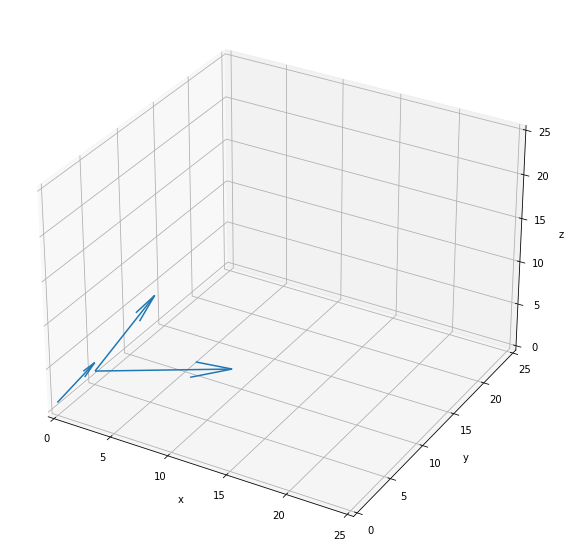

In [51]:
# get s0 and one connecting element (i0 > m0 > i? > m?) into one fixed plane
import forgi.threedee.model.coarse_grain as ftmc
import forgi.threedee.utilities.vector as ftuv
import forgi.utilities.commandline_utils as fuc
import forgi.threedee.classification.aminor as ftca
import forgi.threedee.model as ftm
import os
import numpy as np
import math


def elem_len(cg_d: dict, elem: str) -> float:
    return math.sqrt((cg_d[elem][1][0] - cg_d[elem][0][0])**2 + (cg_d[elem][1][1] - cg_d[elem][0][1])**2 + (cg_d[elem][1][2] - cg_d[elem][0][2])**2)

def s0_dist(cg_d: dict) -> np.ndarray:
    ideal_start = np.array([0, 0, 1])
    return cg_d["s0"][0] - ideal_start

def s0_angle(cg_d: dict) -> np.ndarray:
    s0_len = elem_len(cg_d, "s0")
    A = np.array([0, s0_len, 1])
    B = np.array([0, 0, 1])
    ba = A - B
    s0_vec = cg_d["s0"][1] - cg_d["s0"][0]
    return ftuv.get_alignment_matrix(ba, s0_vec)

def s1_angle(cg_d: dict) -> np.ndarray:
    vec1 = cg_d["s1"][0] - cg_d["s0"][1]
    n = np.array([1, 0, 0])
    proj_n = (np.dot(vec1, n) / np.linalg.norm(n)**2) * n
    vec2 = np.absolute(vec1 - proj_n)
    #print(f"{vec1 = }\n{proj_n = }\n{vec2 = }")

    len_v1 = np.linalg.norm(vec1)
    len_v2 = np.linalg.norm(vec2)
    

    angle = np.arccos(np.dot(vec1, vec2)/(len_v1 * len_v2))

    return angle, vec1, vec2

s1_x_list = []
directory = "../data/old_training_set/"
for file in [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]:

    cg = ftmc.CoarseGrainRNA.from_bg_file(directory + file)

    #cg = ftmc.CoarseGrainRNA.from_bg_file("../data/old_training_set/1asy_R_tRNA001.cg") 
    y_e = cg.coords["s0"][1][1]
    i_end = np.array([0, y_e, 1])

    # check if end of s0 is equal to convention. if not rotate structure
    if not np.array_equal(cg.coords["s0"][1], i_end):
        rot_s0 = s0_angle(dict(cg.coords))
        cg.rotate_translate([0, 0, 0], rot_s0)
    s1angle, v_m0, v_yzproj = s1_angle(dict(cg.coords))
    s0_len = elem_len(dict(cg.coords), "s0")
    v_s0 = np.array([0, s0_len, 1])
    #print(f"{s1angle = }\n{v_s0 = }\n{v_m0 = }\n{v_yzproj = }")
    cg.rotate(s1angle, axis="y")


    diff_start = s0_dist(dict(cg.coords))
    cg.rotate_translate(diff_start, [[1, 0, 0], [0, 1, 0], [0, 0, 1]]) #rot_s0)#

    s1_x_list.append(cg.coords["s1"][0][0])

    #inter = list(set(cg.connections("s0")).intersection(cg.connections("s1")))
    #print(f"{file}\ns0 : {cg.coords['s0']}\nm0 : {cg.coords[inter]}\ns1 : {cg.coords['s1']}")
    #cg.to_file("../../1asy_rot-trans.cg")


print(f"{min(s1_x_list) = }")
print(f"{np.quantile(s1_x_list, q=0.25) = }")
print(f"{np.median(s1_x_list) = }")
print(f"{np.quantile(s1_x_list, q=0.75) = }")
print(f"{max(s1_x_list) = }")




vectors = np.array([
    np.concatenate((np.array([0, 0, 1]), v_s0), axis=None),
    np.concatenate((v_s0, v_m0), axis=None),
    np.concatenate((v_s0, v_yzproj), axis=None)])

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")
X, Y, Z, U, V, W = zip(*vectors)
ax.quiver(X, Y, Z, U, V, W)
ax.set_xlim([0, 25])
ax.set_ylim([0, 25])
ax.set_zlim([0, 25])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()


In [56]:
# are s0 and s1 connected with an element, if yes which?
import os
import forgi.threedee.model.coarse_grain as ftmc

directory =  "../data/train_set/" #"../data/old_training_set/" #

c_dict = {}
for file in [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]:

    cg = ftmc.CoarseGrainRNA.from_bg_file(directory + file)

    #if cg.longrange_iterator():
    inter = list(set(cg.connections("s0")).intersection(cg.connections("s1")))

    if inter[0] not in c_dict:
        c_dict[inter[0]] = 1
    else:
        c_dict[inter[0]] +=1
    
    if len(inter) > 1:
        print("more")
    elif len(inter) == 0:
        print("no")

for key in c_dict:
    print(key, c_dict[key])

m0 2585
i0 275
i3 165


In [19]:
#get nearest k elements
#--> set of k vectors
#plus origin? ie middle of element
import forgi.threedee.model.coarse_grain as ftmc
import forgi.threedee.utilities.vector as ftuv
import forgi.utilities.commandline_utils as fuc
import os
import numpy as np


def k_neighbours(file):
    cg = ftmc.CoarseGrainRNA.from_bg_file(file)

    cg_d = dict(cg.coords)

    #calculate midpoint of each element
    mp_dir = {}
    for elem in cg_d:
        mp = (cg_d[elem][0] + cg_d[elem][1])/2
        mp_dir[elem] = mp

    for e in mp_dir:
        print(e, mp_dir[e])

    #calculate distance from each midpoint to every other
    dist_dir = {}
    for a in mp_dir:
        helper_d = {}
        for b in mp_dir:
            if a != b:
                dist = np.linalg.norm(mp_dir[b] - mp_dir[a])
                helper_d[b] = dist
        if helper_d != {}:
            dist_dir[a] = helper_d

    #get the nearest k=5 elements
    n_dict = {}
    for f in dist_dir:
        n_list = []
        #print(f, {k: v for k, v in sorted(dist_dir[f].items(), key=lambda item: item[1])})

        for i, n in enumerate({k: v for k, v in sorted(dist_dir[f].items(), key=lambda item: item[1])}):
            n_list.append(n)

            if i == 3:
                break
        n_dict[f] = n_list

    print(n_dict)

    for elem in n_dict:
            v_arr = []
            for e in n_dict[elem]:
                vec = []
                for i in range(3):
                    p = mp_dir[e][i] - mp_dir[elem][i]
                    vec.append(p)
                v_arr.append(np.array(vec))
            print(elem, np.concatenate(v_arr))

k_neighbours("../data/train_set/1c2x_C_5srRNA_C_be10.cg")

s0 [0.     8.9245 1.    ]
m0 [ 4.59102755 23.31909891  2.58395171]
s1 [ 9.14899228 27.50862663  4.24800654]
i0 [ 9.31876632 23.52742755  5.12067852]
s2 [ 9.85914283 18.2925279   5.95546788]
i1 [11.97891593 18.95004125 12.37592786]
s3 [10.75129627 21.21650161 20.93528831]
h0 [ 5.16043193 32.90573557 18.3901679 ]
m1 [ 9.76132007 31.47540551  3.9760168 ]
s4 [10.85353961 35.3099031   3.5278488 ]
i2 [10.50398669 45.12914478  7.43011927]
s5 [13.22877687 55.55225496 19.57039629]
h1 [18.26331436 53.22239035 32.22612492]
m2 [ 5.17029252 26.0053066   2.39206509]
t0 [ 4.8359959  -1.74050432  0.42341416]
{'s0': ['t0', 's2', 'm0', 'i0'], 'm0': ['m2', 'i0', 's1', 's2'], 's1': ['m1', 'i0', 'm2', 'm0'], 'i0': ['s1', 's2', 'm0', 'm2'], 's2': ['i0', 'i1', 'm0', 's1'], 'i1': ['s2', 's3', 'i0', 's1'], 's3': ['i1', 'h0', 's2', 'i0'], 'h0': ['s3', 'm1', 's1', 's4'], 'm1': ['s4', 's1', 'm2', 'i0'], 's4': ['m1', 's1', 'i2', 'm2'], 'i2': ['s4', 'm1', 's5', 'h0'], 's5': ['h1', 'i2', 'h0', 's4'], 'h1': ['s5', 'i

In [6]:
#Open lmdb files
import lmdb
import gzip
import json
import numpy as np
import pandas as pd
#import pdbtools

'''
b'id_to_idx'
b'num_examples'
b'serialization_format'
'''


lmdb_file = "/home/milan/Programs/ares_release/data/lmdbs/train/"
lmdb_env = lmdb.open(lmdb_file)
lmdb_txn = lmdb_env.begin()
lmdb_cursor = lmdb_txn.cursor()

print(lmdb_env.stat())

idx = lmdb_cursor.get("idx_to_idx".encode())#.decode() #gzip.decompress(
print(idx)


i = gzip.decompress(lmdb_cursor.get("0".encode())).decode()

d = json.loads(i)

i_json = pd.read_json(i)

columns = i_json.iloc[0,0]
index = i_json.iloc[1,0]
data = i_json.iloc[2,0]

i_new = pd.DataFrame(data=data, index=index, columns=columns)

pdb_out = pd.DataFrame(i_new, columns=["serial_number", "subunit", "chain", "residue", "resname", "x", "y", "z", "element", "name"])

pdb_out.head()

{'psize': 4096, 'depth': 1, 'branch_pages': 0, 'leaf_pages': 1, 'overflow_pages': 256, 'entries': 53}
None


,serial_number,subunit,chain,residue,resname,x,y,z,element,name
0,1,0,A,1,C,7.278,9.150,14.138,C,C5'
1,2,0,A,1,C,6.457,10.282,13.572,C,C4'
2,3,0,A,1,C,7.273,11.210,12.812,O,O4'
3,4,0,A,1,C,5.459,9.762,12.567,C,C3'
4,5,0,A,1,C,4.329,9.250,13.226,O,O3'


In [1]:
#get list of representative RNA structures

rep_pdbs = []
with open("../data/nrlist_3.220_4.0A.csv", "r") as fh:
    for line in fh.readlines():
        equ = line.split(",")[0].lower().lstrip('"').rstrip('"')
        all = line.split(",")[1].lower().lstrip('"').rstrip('"')
        if "+" in all:
            l = all.split("+")
            for i in l:
                id = i.split("|")
                rep_pdbs.append(id+[equ])
        else:
            pdb = all.split("|")
            rep_pdbs.append(pdb+[equ])

rfam_pdbs = {}
with open("../data/Rfam.pdb", "r") as fh:
    for line in fh.readlines()[1:]:
        pdb = line.split("\t")
        rfam_pdbs[pdb[1]] = pdb


c = 0
nc = 0
lines = []
rmc_dict = {}
for item in rep_pdbs:
    if item[0] in rfam_pdbs.keys():
        c +=1
    else:
        nc +=1
    l = item[0] + "\t" + item[1] + "\t" + item[2] + "\t" + item[3] + "\n"
    lines.append(l)

    

#with open("../data/rep_rfam_list.txt", "w") as fh:
#    for line in lines:
#        fh.write(line)

print(rep_pdbs[0])
print("len rep pdbs", len(rep_pdbs))
print("len rfam pdbs", len(rfam_pdbs))
print("rep in rfam", c)
print("rep not in rfam", nc)

for k in sorted(rmc_dict):
    print(k, rmc_dict[k])


['4v9q', '1', 'dv', 'nr_4.0_29909.1']
len rep pdbs 2862
len rfam pdbs 2305
rep in rfam 656
rep not in rfam 2206


In [5]:
# work with list of representative RNA structures
rep_dict = {}
with open("../data/rep_rna_trans.txt", "r") as fh:
    for line in fh.readlines():
        #print(line.split("\t\t\t"))
        rep, num = line.lstrip().split("\t\t\t")
        #print(rep)
        if len(rep) > 15:
            print(rep)
        if rep not in rep_dict:
            if "," in num:
                n = num.rstrip("\n").split(",")
            else:
                n = [num.rstrip("\n")]
            #n = [a.lstrip() for a in n]
            rep_dict[rep] = n
        else:
            if "," in num:
                n = num.rstrip("\n").split(",")
            else:
                n = [num.rstrip("\n")]
            #n = [a.lstrip() for a in n]
            rep_dict[rep] += n

#for key in rep_dict:
#    print(key, rep_dict[key])

lines = []
for key in sorted(rep_dict):
    for nr in rep_dict[key]:
        for number in nr.split(","):
            line = f"{number}\t{key}\n"
            lines.append(line)

    #if len(rep_dict[key]) == 1:
    #    l = f"{str(key)}\t\t\t{rep_dict[key][0]}\n"
    #    lines.append(l)
    #else:
    #    nrs = (",").join(rep_dict[key])
    #    l = f"{str(key)}\t\t\t{nrs}\n"
    #    lines.append(l)


#with open("../data/rep_nr_to_name.txt", "w") as fh:
#    for line in lines:
#        fh.write(line)

GCAG(7AT)CUUAAGUCUGC
cyclic-AMP-AMP-GMP
cyclic-oligoadenylate
haripin-ribozyme
substrate-analog
tRNA-Arg-anticodon
transcriptionBubble
twister-ribozyme


In [2]:
#is it possible to get elements interacting in 3d space?
import forgi.threedee.model.coarse_grain as ftmc
import forgi.threedee.utilities.vector as ftuv
import forgi.threedee.utilities as ftu
import forgi.utilities.commandline_utils as fuc
import forgi.threedee.classification.aminor as ftca
import forgi.threedee.utilities._dssr as ftud
import os
import numpy as np
import subprocess


directory = "../data/train_set/"

#dssr = ftud.DSSRAnnotation()

for i, file in enumerate([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]):
    cg = ftmc.CoarseGrainRNA.from_bg_file(directory + file) #("../../PDBs/3f2q/best_rmsd0.coord")

    #dssr = dict(subprocess.check_output(["x3dna-dssr", f"-i={directory+file}", "--json"]))
    cg_d = dict(cg.coords)
    #print(dssr)
    print(file)
    #A-minor interactions
    for pair in ftca.all_interactions(cg):
        print(pair)
    
    #print(ftud.DSSRAnnotation(dssr=dssr ,cg=cg))
    #for elem in cg.sorted_element_iterator():
    #    print(elem, cg.connections(elem))
    
    #print(ftca.all_interactions(cg))

    

    if i == 5:
        break

test = "../data/train_set/6k0b_U_tRNA_U_br0.cg"
print(test)
tcg =  ftmc.CoarseGrainRNA.from_bg_file(test)
s3_c = tcg.coords["s3"]
print(s3_c)
print(s3_c[1] - s3_c[0])
print(dict(tcg.twists)["s3"])
#k_neighbours(test)
#for pair in ftca.all_interactions(tcg):
#    print(pair)

5jb3_4_tRNA_4_rn37.cg
['h0' 's0']
5b63_D_tRNA_D_rn08.cg
5jb3_4_tRNA_4_be41.cg
['h2' 's0']
6k0b_U_tRNA_U_rn11.cg
2zjq_Y_5srRNA_Y_rn04.cg
['i0' 's0']
['i1' 's1']
['i3' 's7']
['h0' 's3']
['h1' 's5']
6lvr_D_tRNA_D_rn01.cg
['h0' 's3']
../data/train_set/6k0b_U_tRNA_U_br0.cg
(array([-25.76317269,  31.68715453,  -8.25223647]), array([-30.75040103,  31.07632259,  -9.20482966]))
[-4.98722834 -0.61083194 -0.95259319]
(array([-0.16315342, -0.18053565,  0.96994218]), array([-0.20529093,  0.80253204,  0.56017673]))


In [14]:
# convert pdbs to be compatible with ares
import os

directory = "/scr/risa/mgeyer/ernwinenv/data/missing_pdbs/"

new_dir = "/scr/risa/mgeyer/ares_test/"

for file in [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]:
    new = f"{file[:-4]}_atms.pdb"

    lines = []
    with open(directory + file) as fh:
        for i, line in enumerate(fh.readlines()):
            if line[:4] == "ATOM":
                #lines.append(line)
                n = line.split("\t")
                #if i == 1:
                print(n)
                #print(len(n))
    
    #with open(new_dir + new, "w") as new_fh:
    #    for l in lines:
    #        new_fh.write(l)



['ATOM  25082  OP3   G B   1     152.242  82.985 121.523  1.00229.75           O  \n']
['ATOM  25083  P     G B   1     151.726  84.360 121.326  1.00228.83           P  \n']
['ATOM  25084  OP1   G B   1     151.321  84.481 119.906  1.00229.84           O  \n']
['ATOM  25085  OP2   G B   1     152.736  85.303 121.863  1.00227.84           O  \n']
["ATOM  25086  O5'   G B   1     150.409  84.539 122.203  1.00223.84           O  \n"]
["ATOM  25087  C5'   G B   1     149.598  83.421 122.536  1.00223.01           C  \n"]
["ATOM  25088  C4'   G B   1     148.378  83.350 121.655  1.00221.52           C  \n"]
["ATOM  25089  O4'   G B   1     147.723  82.069 121.820  1.00216.09           O  \n"]
["ATOM  25090  C3'   G B   1     147.281  84.363 121.938  1.00220.38           C  \n"]
["ATOM  25091  O3'   G B   1     147.553  85.634 121.378  1.00223.62           O  \n"]
["ATOM  25092  C2'   G B   1     146.049  83.694 121.346  1.00210.69           C  \n"]
["ATOM  25093  O2'   G B   1     145.992  8